In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [4]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

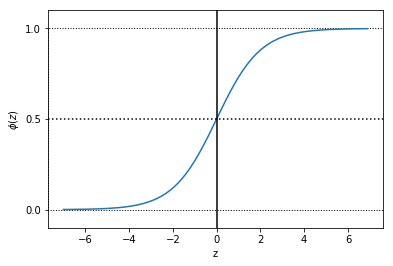

In [26]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', edgecolor='k', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [34]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [29]:
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx])
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0, c='', linewidth=1, marker='o', s=55)

In [41]:
from sklearn.linear_model import LogisticRegression

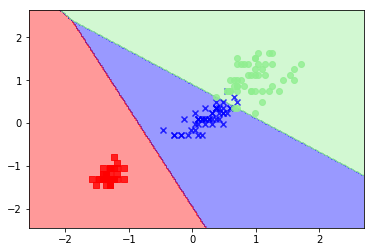

In [52]:
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.show()

In [47]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

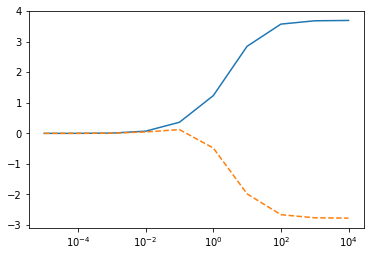

In [70]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**np.int(c), random_state=0)
    lr.fit(X_test_std, y_test)
    weights.append(lr.coef_[1])
    params.append(10**np.int(c))
    
weights = np.array(weights)
plt.plot(params, weights[:, 0])
plt.plot(params, weights[:, 1], linestyle='--')
plt.xscale('log')
plt.show()

In [66]:
weights

array([[ 8.36643131e-05,  5.81094810e-05],
       [ 8.35384478e-04,  5.79813053e-04],
       [ 8.22881652e-03,  5.67540581e-03],
       [ 7.18488128e-02,  4.65145430e-02],
       [ 3.63862047e-01,  1.23467148e-01],
       [ 1.23599029e+00, -4.79526701e-01],
       [ 2.85365012e+00, -1.98310738e+00],
       [ 3.58107713e+00, -2.66546028e+00],
       [ 3.68985879e+00, -2.76747766e+00],
       [ 3.70133698e+00, -2.77824159e+00]])